# Final Project
## Model to predict fire duration

### Boilerplate

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

### Fire Data

In [262]:
# All data in dataset
all_data = pd.read_csv("Updated Fire Data - First 10K.csv")
display(all_data)

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DURATION_HOURS,Precipitation_In_Month,Avg_Temp_In_Month
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,...,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,4.500000,3.69,45.6
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,6.750000,0.08,60.2
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,1.050000,0.08,60.2
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,118.000000,0.06,66.8
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,...,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,116.000000,0.06,66.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,9996,b'\x00\x01\xad\x10\x00\x00t\xf7\x9b\xb1Q\xd0^\...,10044,FS-1437373,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,...,41.264167,-123.255000,USFS,CA,93.0,6093.0,Siskiyou County,18.333333,0.06,76.6
9957,9997,b'\x00\x01\xad\x10\x00\x00\xf4\xa5\xc8kOB^\xc0...,10045,FS-1437374,FED,FS-FIRESTAT,FS,USORFWF,Fremont-Winema National Forest,602,...,42.336944,-121.036111,USFS,OR,35.0,41035.0,Klamath County,0.250000,0.71,66.8
9958,9998,b'\x00\x01\xad\x10\x00\x00\xb067\xed|\x8e^\xc0...,10046,FS-1437375,FED,FS-FIRESTAT,FS,USORUPF,Umpqua National Forest,615,...,43.230833,-122.226389,USFS,OR,19.0,41019.0,Douglas County,67.283333,0.20,65.1
9959,9999,b'\x00\x01\xad\x10\x00\x00 \x11\x08\xdeJ\xd2^\...,10047,FS-1437376,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,...,41.137778,-123.285833,USFS,CA,93.0,6093.0,Siskiyou County,73.500000,0.06,76.6


In [263]:
# Select only the data we need for the regression model
data = pd.DataFrame(all_data, columns = ['DURATION_HOURS', 'Precipitation_In_Month', 'Avg_Temp_In_Month'])
display(data)

,DURATION_HOURS,Precipitation_In_Month,Avg_Temp_In_Month
0,4.500000,3.69,45.6
1,6.750000,0.08,60.2
2,1.050000,0.08,60.2
3,118.000000,0.06,66.8
4,116.000000,0.06,66.8
...,...,...,...
9956,18.333333,0.06,76.6
9957,0.250000,0.71,66.8
9958,67.283333,0.20,65.1
9959,73.500000,0.06,76.6


Text(0.5, 1.0, 'Boxplot of fire duration in hours')

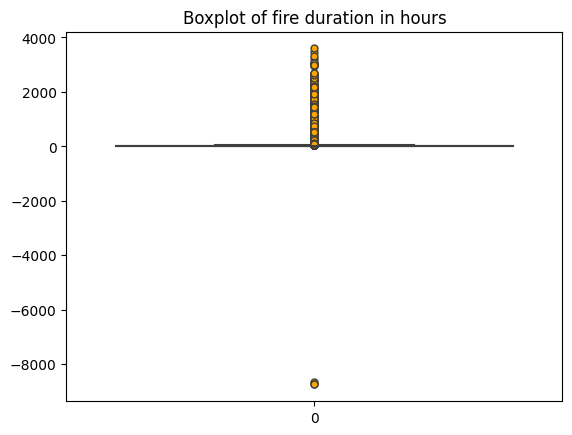

In [297]:
# Boxplot to show 
sns.boxplot(data.DURATION_HOURS, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Boxplot of fire duration in hours')

In [265]:
# Find outliers in fire duration
summary_statistics = data['DURATION_HOURS'].describe()
print(summary_statistics)

count    9924.000000
mean       54.996285
std       303.503018
min     -8743.283333
25%         1.666667
50%         4.500000
75%        22.250000
max      3593.900000
Name: DURATION_HOURS, dtype: float64


In [266]:
# Remove outliers
min_value = 0
max_value = 22.25

filter_values = (data['DURATION_HOURS'] >= min_value) & (data['DURATION_HOURS'] <= max_value)

filtered_df = data[filter_values]
df = filtered_df
df

,DURATION_HOURS,Precipitation_In_Month,Avg_Temp_In_Month
0,4.500000,3.69,45.6
1,6.750000,0.08,60.2
2,1.050000,0.08,60.2
5,22.000000,0.06,66.8
6,20.000000,0.19,73.2
...,...,...,...
9951,3.916667,0.71,66.8
9952,4.533333,0.20,65.1
9953,0.500000,0.90,71.9
9956,18.333333,0.06,76.6


Text(0.5, 1.0, 'New boxplot of fire duration in hours with filtered data')

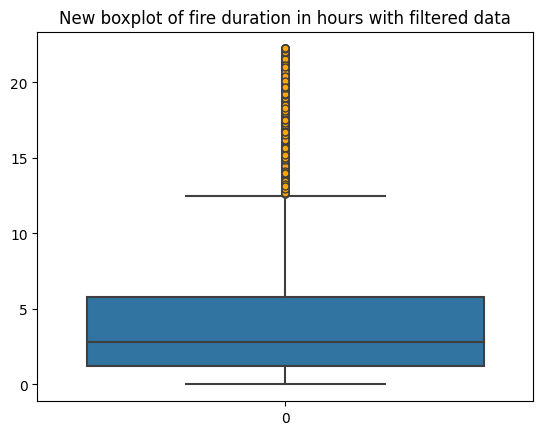

In [298]:
# New boxplot shows more reasonable data
sns.boxplot(filtered_df.DURATION_HOURS, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('New boxplot of fire duration in hours with filtered data')

### MSE and R^2 of model

In [299]:
# Use precipitation and temperature to predict fire duration
X = df[['Precipitation_In_Month', 'Avg_Temp_In_Month']]
y = df['DURATION_HOURS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the fire duration on the test set
y_pred = model.predict(X_test)

# Evaluate the model using MSE and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 33.86161285042513
R^2 Score: 0.004185086837383611


### Coefficients of regression model

In [300]:
features = X.columns
# Create a DataFrame for the coefficients
coef_df = pd.DataFrame(data=coefficients, index=features, columns=['Coefficient'])

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame(data=[intercept], index=['Intercept'], columns=['Coefficient'])

# Concatenating the coefficients with the intercept
final_df = pd.concat([intercept_df, coef_df])

print(final_df)

                        Coefficient
Intercept                  3.280070
Precipitation_In_Month    -0.008652
Avg_Temp_In_Month          0.028332


In [304]:
# Formula to predict fire duration
def fire_duration(Precipitation_In_Month, Avg_Temp_In_Month):
    pred = intercept + (Precipitation_In_Month) * coefficients[0] + (Avg_Temp_In_Month) * coefficients[1]
    pred = round(pred, 2)
    print("If there is a fire during a month that has an average precipitation of", Precipitation_In_Month, 
          "inches,\nand has an average temperature of", Avg_Temp_In_Month,
          "degrees farenheit,\nthen we can predict that the fire will last about", pred, "hours.\n")

In [308]:
# Testing formula
fire_duration(0.08, 60.2)
fire_duration(0.42, 65.1)
fire_duration(0.02, 74.8)

If there is a fire during a month that has an average precipitation of 0.08 inches,
and has an average temperature of 60.2 degrees farenheit,
then we can predict that the fire will last about 4.98 hours.

If there is a fire during a month that has an average precipitation of 0.42 inches,
and has an average temperature of 65.1 degrees farenheit,
then we can predict that the fire will last about 5.12 hours.

If there is a fire during a month that has an average precipitation of 0.02 inches,
and has an average temperature of 74.8 degrees farenheit,
then we can predict that the fire will last about 5.4 hours.

